# 6.2. WHR_Exploring Relationships

## This script contains the following points:

#### 1. Importing Visualization Libraries
#### 2. Loading and Checking the Data
#### 3. Exploring Relationships
#### 3.1. Correlation matrix heatmap (colored)
#### 3.2. Scatterplot(s) for the variables with the strongest correlations
#### 3.3. Pair plot of the entire data set
#### 3.4. Categorical plot
#### 4. Initial and Further Questions
#### 5. Hypotheses


# 1. Importing Visualization Libraries 

In [1]:
# Import libraries: pandas, NumPy, os, 
# Import Visualization Libraries: matplotlib and seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [2]:
# Check lib version

print("Seaborn version:", sns.__version__)
print("Matplotlib version:", mpl.__version__)

Seaborn version: 0.13.2
Matplotlib version: 3.8.4


In [3]:
# Ensure charts are displayed without the need to "call" them specifically

%matplotlib inline

# 2. Loading and Checking the Data

In [4]:
# folder path to my main project folder is now stored within variable 'path'

path = r'/Users/pau/10-06-2024 World Happiness Report'

#### Importing the “WHR_2019_cleaned.csv” data set into my Jupyter notebook using the os library as df_whr

In [5]:
# using the os.path.join() function to simplify the importing data and create dataframe: whr

df_whr = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','WHR_2019_cleaned.csv'), index_col = False)

### Checking the dimensions of the imported dataframe and if the data is correctly loaded

In [6]:
# Checking “WHR_2019_cleaned.csv” data is correctly loaded

print(df_whr.head()) # to ensure nothing looks off about our imported dataframes.
print(df_whr.info())
df_whr.shape # to confirm the total size of our imported df. Great way to get a feel for the data and have a better idea how to proceed.

   Unnamed: 0  rank country_or_region  happiness_score  GDP_per_capita  \
0           0     1           Finland            7.769           1.340   
1           1     2           Denmark            7.600           1.383   
2           2     3            Norway            7.554           1.488   
3           3     4           Iceland            7.494           1.380   
4           4     5       Netherlands            7.488           1.396   

   social_support_score  life_expectancy  freedom_score  generosity_score  \
0                 1.587            0.986          0.596             0.153   
1                 1.573            0.996          0.592             0.252   
2                 1.582            1.028          0.603             0.271   
3                 1.624            1.026          0.591             0.354   
4                 1.522            0.999          0.557             0.322   

   corruption_perception_score  
0                        0.393  
1                        0

(156, 10)

# 3. Exploring Relationships

#### Subsetting: Creating a subset of the data set to explore their relationships

In [7]:
# Columns to keep: picking out variables from the data set suitable for my exploratory visual analysis

columns_to_keep = ['rank', 'happiness_score', 'GDP_per_capita', 'social_support_score', 'life_expectancy', 'freedom_score', 'generosity_score', 'corruption_perception_score']


In [8]:
# Create a subset of the dataset with only the selected columns

df_sub = df_whr[columns_to_keep]

In [9]:
# Checking the new dataframe created with the subset

df_sub.head()

,rank,happiness_score,GDP_per_capita,social_support_score,life_expectancy,freedom_score,generosity_score,corruption_perception_score
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# 3.1. Correlation matrix heatmap (colored)

In [10]:
# Create a correlation matrix using pandas

df_sub.corr()

,rank,happiness_score,GDP_per_capita,social_support_score,life_expectancy,freedom_score,generosity_score,corruption_perception_score
rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
happiness_score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP_per_capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
social_support_score,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
life_expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
freedom_score,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
generosity_score,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
corruption_perception_score,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


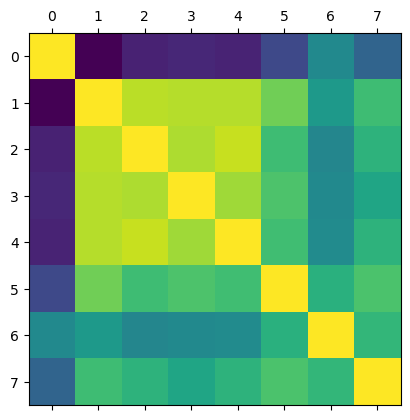

In [11]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_sub.corr())
plt.show()

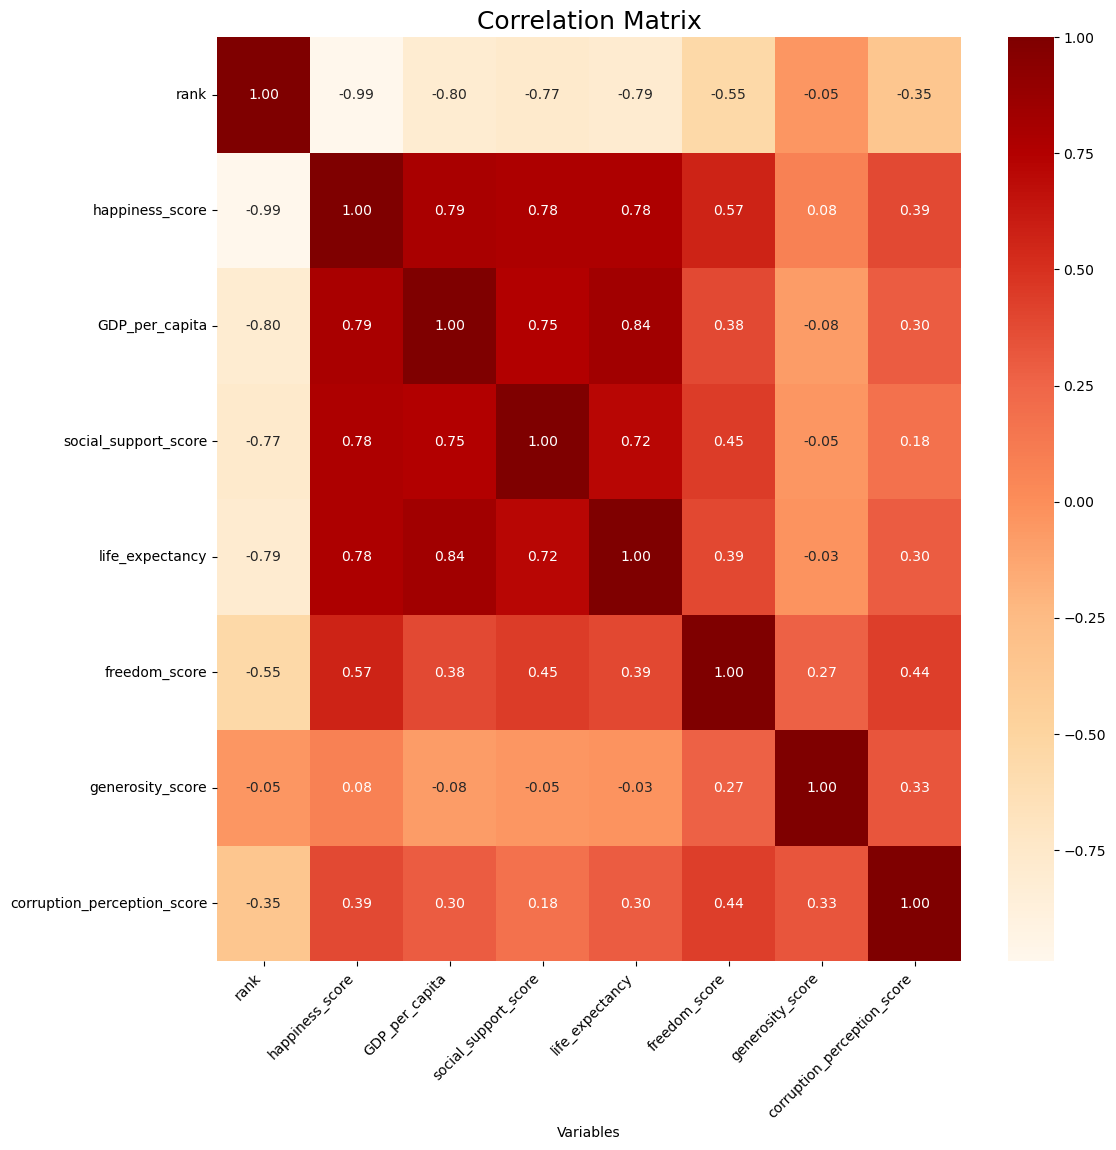

In [12]:
# Create a subplot with matplotlib

f, ax = plt.subplots(figsize=(12,12)) # figure size 

# Create the correlation matrix heatmap with seaborn, using a colormap with reversed colors
corr = sns.heatmap(df_sub.corr(), annot=True, fmt = '.2f', cmap='OrRd', ax = ax)  # annotate matrix with correlation figures

plt.title('Correlation Matrix', fontsize = 18) # add a title)
plt.xlabel('Variables') 

plt.xticks(fontsize=10, rotation=45, ha='right') # Rotate the x-axis labels
plt.yticks(fontsize=10) # y axis labels
plt.savefig("/Users/pau/10-06-2024 World Happiness Report/04 Analysis/Visualizations/Correlation_Matrix.png") # Save figure
plt.show() # Show the plot


#### What the coefficients in the plot mean in terms of the relationships between the variables:

1. **Rank and Happiness Score**: There is a strong negative correlation (-0.989) between the rank and happiness score. This indicates that countries with lower ranks (higher numerical values) tend to have lower happiness scores, and countries with higher ranks (lower numerical values) tend to have higher happiness scores.

2. **Happiness Score and GDP per Capita**: There is a strong positive correlation (0.794) between the happiness score and GDP per capita. This suggests that countries with higher GDP per capita tend to have higher happiness scores.

3. **Happiness Score and Social Support Score**: Similarly, there is a strong positive correlation (0.777) between the happiness score and social support score. This implies that countries with higher levels of social support tend to have higher happiness scores.

4. **Happiness Score and Life Expectancy**: There is also a strong positive correlation (0.780) between the happiness score and life expectancy. This indicates that countries with higher life expectancies tend to have higher happiness scores.

5. **Happiness Score and Freedom Score**: The correlation coefficient between the happiness score and freedom score is moderately strong (0.567). This suggests that countries with greater freedom tend to have higher happiness scores, although the relationship is not as strong as with other factors.

6. **Happiness Score and Generosity Score**: There is a weak positive correlation (0.076) between the happiness score and generosity score. This suggests that there is a slight tendency for countries with higher generosity scores to have higher happiness scores, but the relationship is not significant.

7. **Happiness Score and Corruption Perception Score**: There is a moderate positive correlation (0.386) between the happiness score and corruption perception score. This implies that countries with lower levels of perceived corruption tend to have higher happiness scores.

# 3.2. Scatterplot(s) for the variables with the strongest correlations

#### The happiness score has the strongest POSITIVE correlation with:

1. GDP per capita
2. Social support score
3. Life expectency

This suggests that factors such as economic prosperity, strong social support systems, and longer life expectancies contribute positively to overall happiness levels in countries.

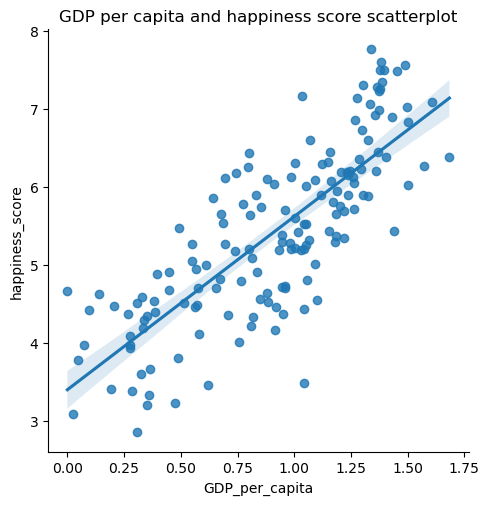

In [13]:
# GDP per capita and happiness score scatterplot

sns.lmplot(x = 'GDP_per_capita', y = 'happiness_score', data = df_sub)
plt.title('GDP per capita and happiness score scatterplot', fontsize = 12) # add a title)
plt.savefig("/Users/pau/10-06-2024 World Happiness Report/04 Analysis/Visualizations/scatterplot_GDP_happiness_score.png") # Save figure


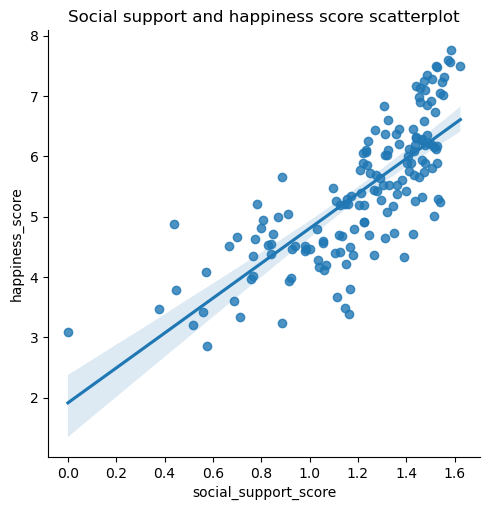

In [14]:
# Social support score and happiness score scatterplot

sns.lmplot(x = 'social_support_score', y = 'happiness_score', data = df_sub)
plt.title('Social support and happiness score scatterplot', fontsize = 12) # add a title)
plt.savefig("/Users/pau/10-06-2024 World Happiness Report/04 Analysis/Visualizations/scatterplot_Social_support_happiness_score.png") # Save figure


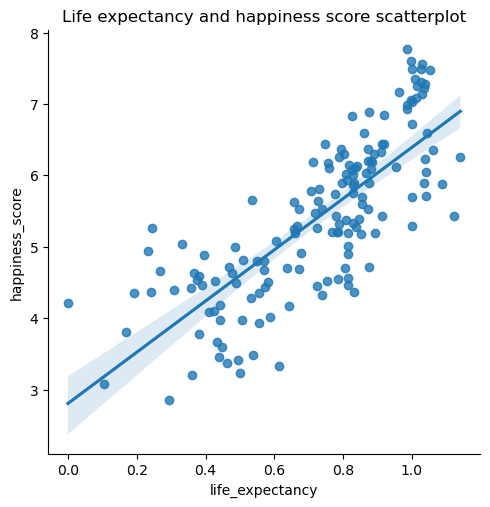

In [15]:
# Life expectancy and happiness score scatterplot

sns.lmplot(x = 'life_expectancy', y = 'happiness_score', data = df_sub)
plt.title('Life expectancy and happiness score scatterplot', fontsize = 12) # add a title)
plt.savefig("/Users/pau/10-06-2024 World Happiness Report/04 Analysis/Visualizations/scatterplot_life_expectancy_happiness_score.png") # Save figure


# 3.3. Pair plot of the entire data set

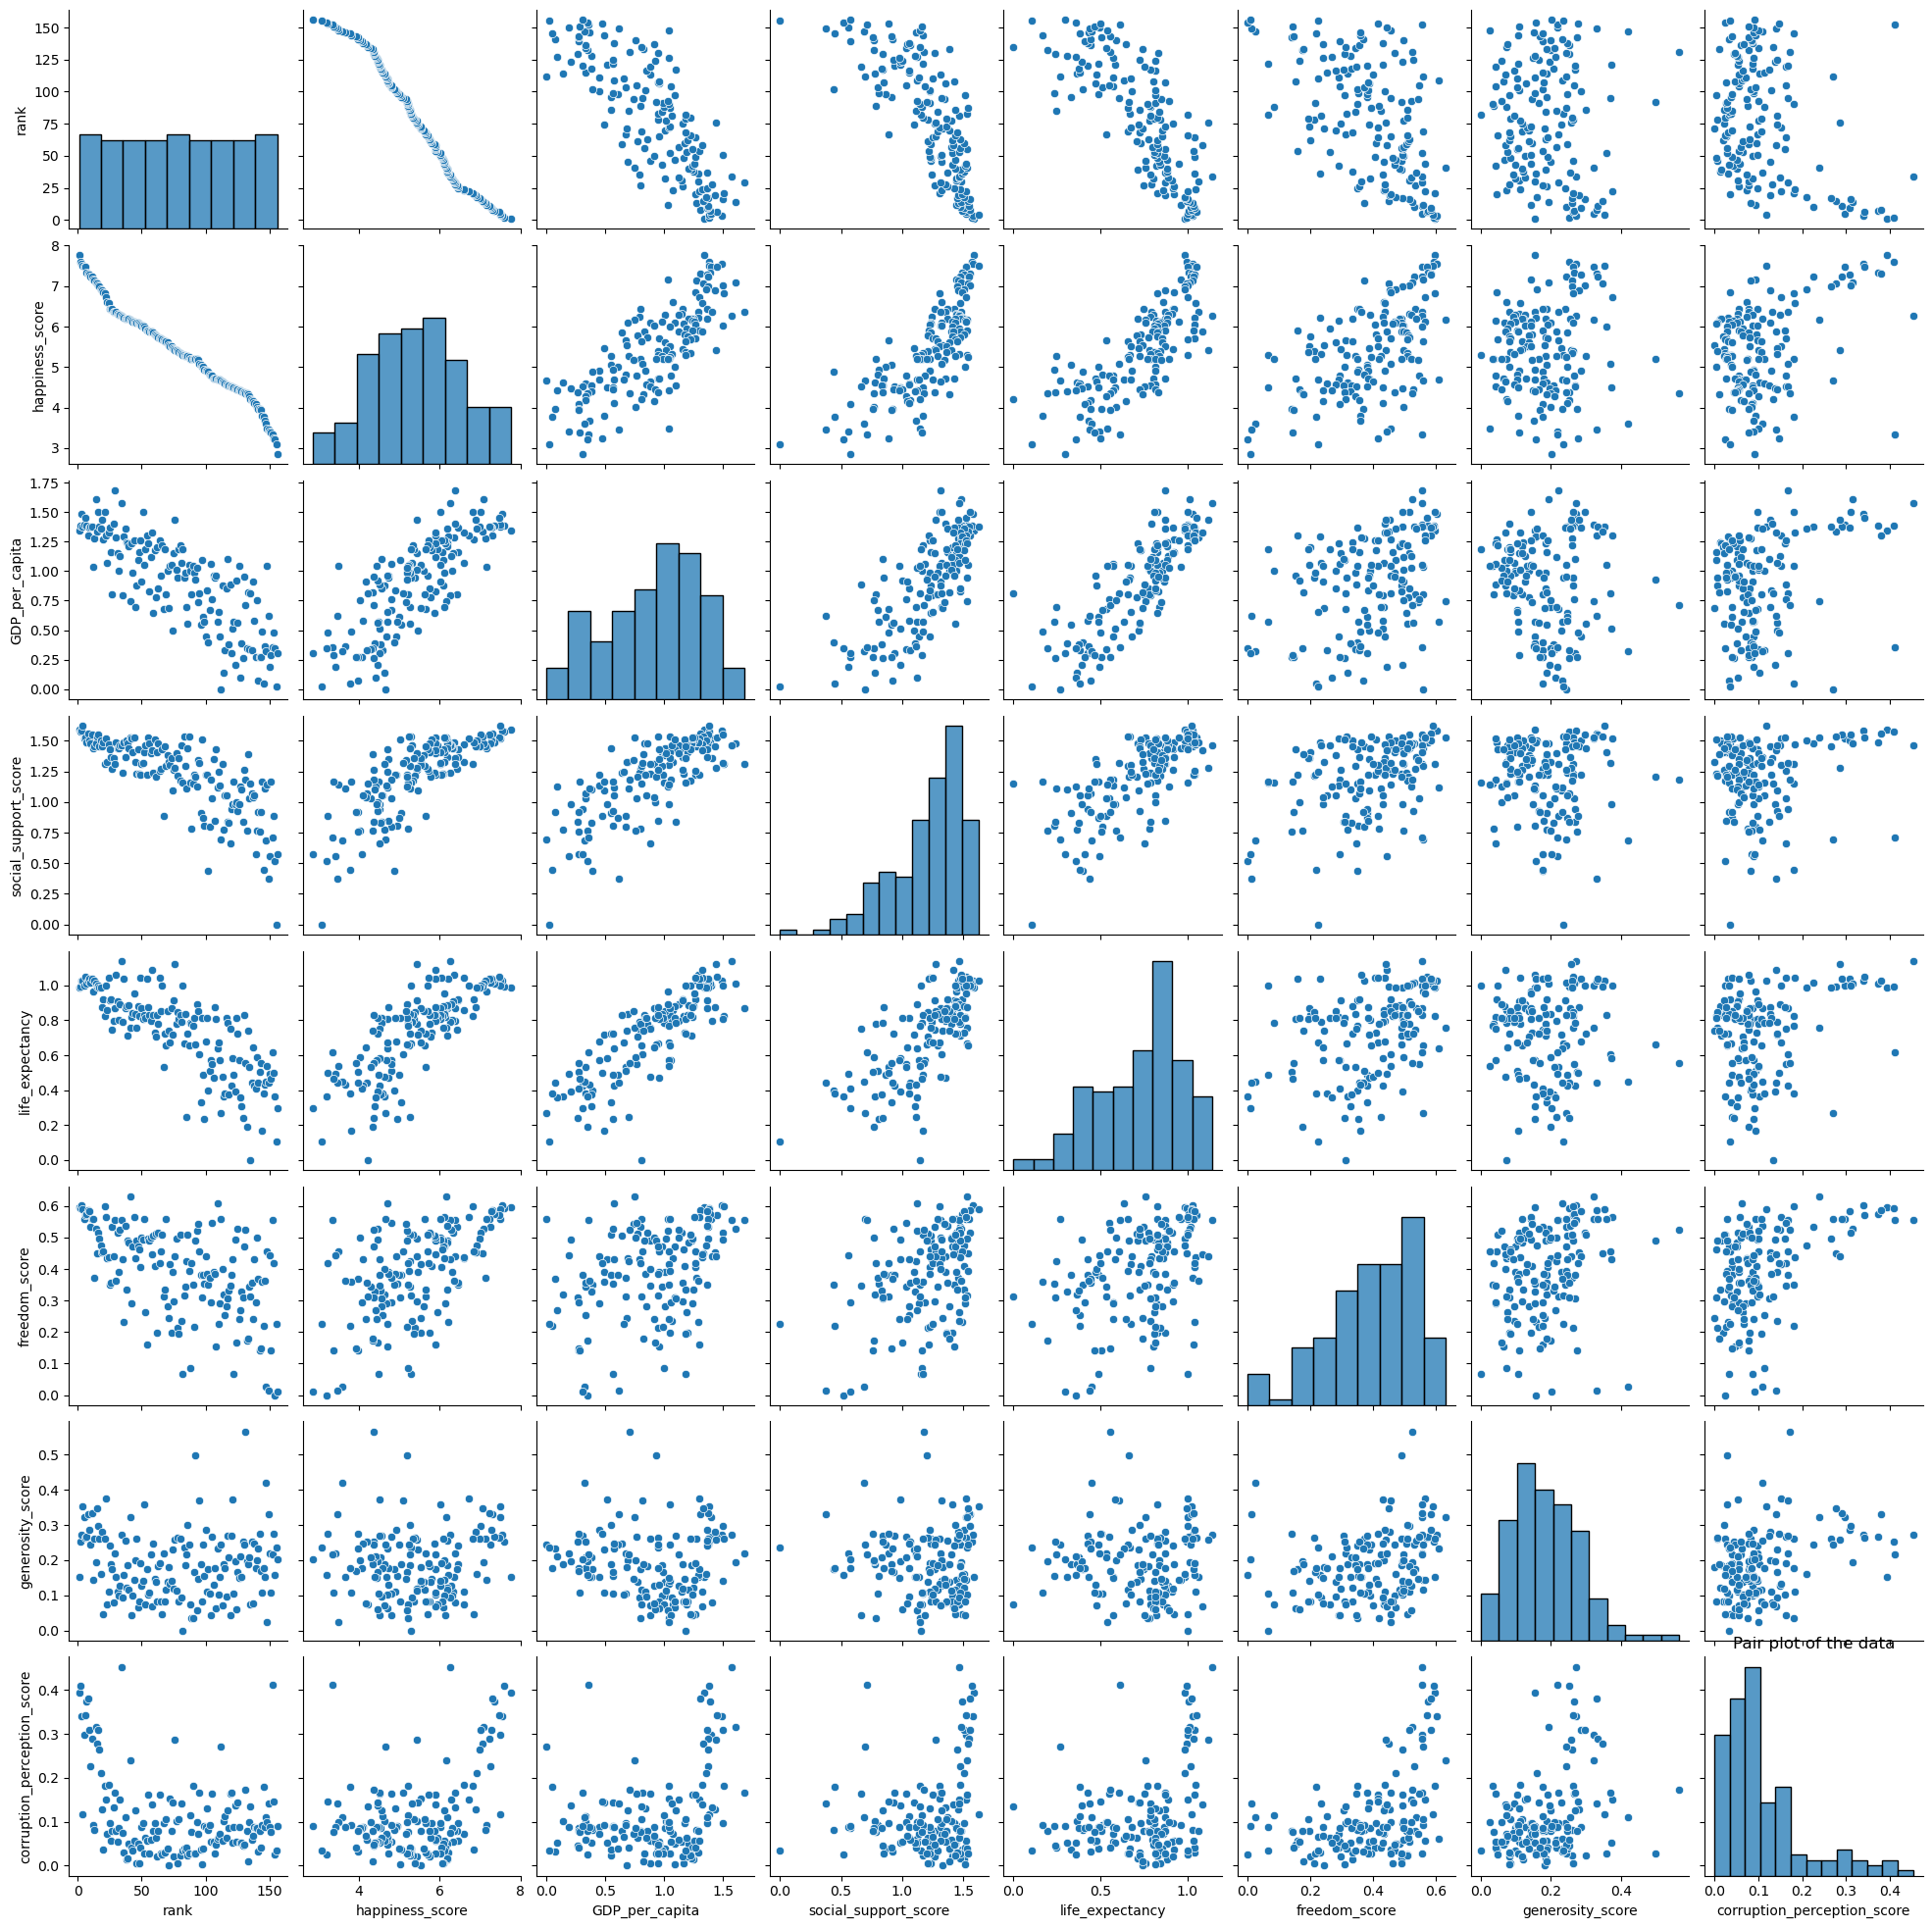

In [16]:
# Create pair plot of entire data

pair_plot_all = sns.pairplot(df_sub)

plt.title('Pair plot of the data', fontsize = 12) # add a title)
plt.savefig("/Users/pau/10-06-2024 World Happiness Report/04 Analysis/Visualizations/pair_plot_of_entire_data.png") # Save figure


### Strong correlation variables

In [17]:
# Create subset for strong corr.

df_sub_strong = df_whr.drop(['Unnamed: 0', 'rank', 'country_or_region', 'freedom_score', 'generosity_score', 'corruption_perception_score'], axis = 1)


In [18]:
# Checking the new dataframe created with the subset

df_sub_strong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   happiness_score       156 non-null    float64
 1   GDP_per_capita        156 non-null    float64
 2   social_support_score  156 non-null    float64
 3   life_expectancy       156 non-null    float64
dtypes: float64(4)
memory usage: 5.0 KB


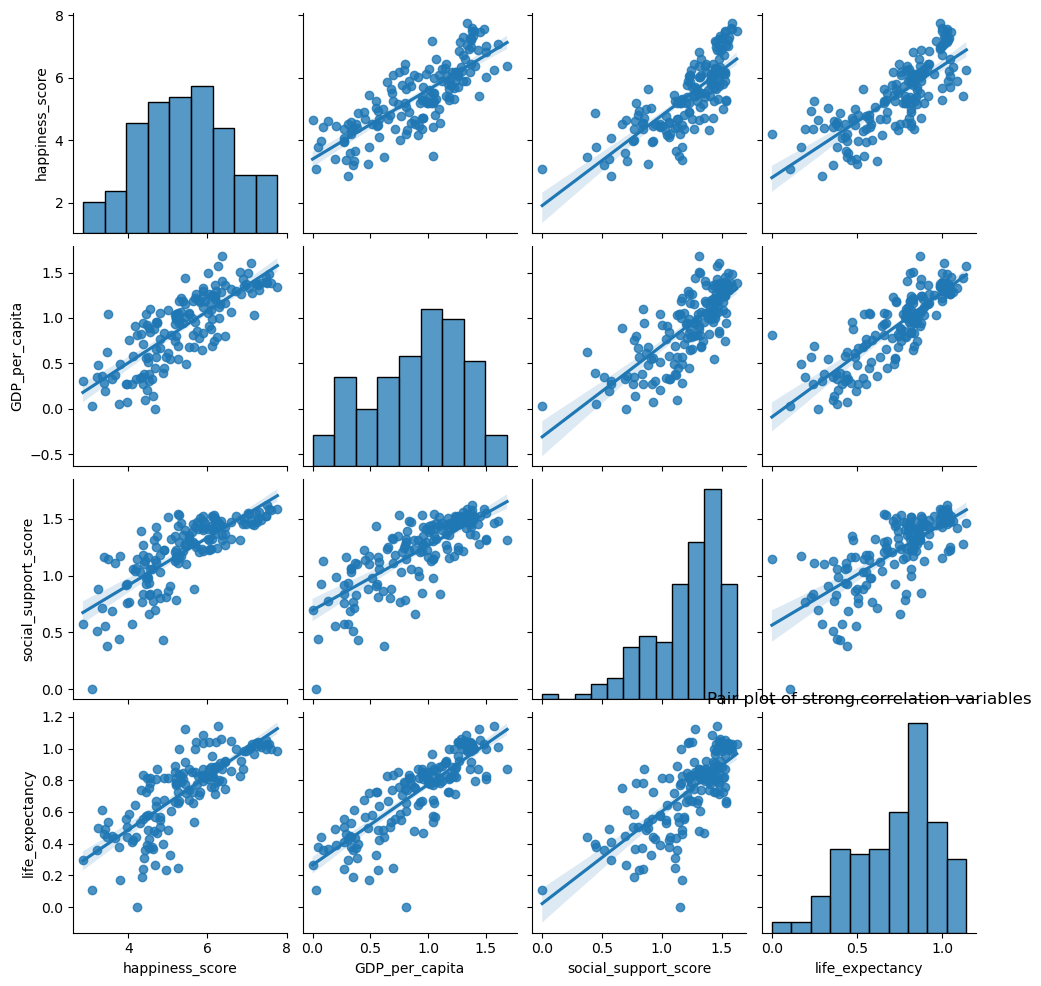

In [19]:
# Create pair plot of strong corr.

pair_plot_strong = sns.pairplot(df_sub_strong, kind='reg')
plt.title('Pair plot of strong correlation variables', fontsize = 12) # add a title)
plt.savefig("/Users/pau/10-06-2024 World Happiness Report/04 Analysis/Visualizations/pair_plot_strong_corr.png") # Save figure


### Weak correlation variables

In [20]:
# Create subset for weak corr.

df_sub_weak = df_whr.drop(['Unnamed: 0', 'rank', 'country_or_region', 'GDP_per_capita', 'social_support_score', 'life_expectancy'], axis = 1)


In [21]:
# Checking the new dataframe created with the subset

df_sub_weak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   happiness_score              156 non-null    float64
 1   freedom_score                156 non-null    float64
 2   generosity_score             156 non-null    float64
 3   corruption_perception_score  156 non-null    float64
dtypes: float64(4)
memory usage: 5.0 KB


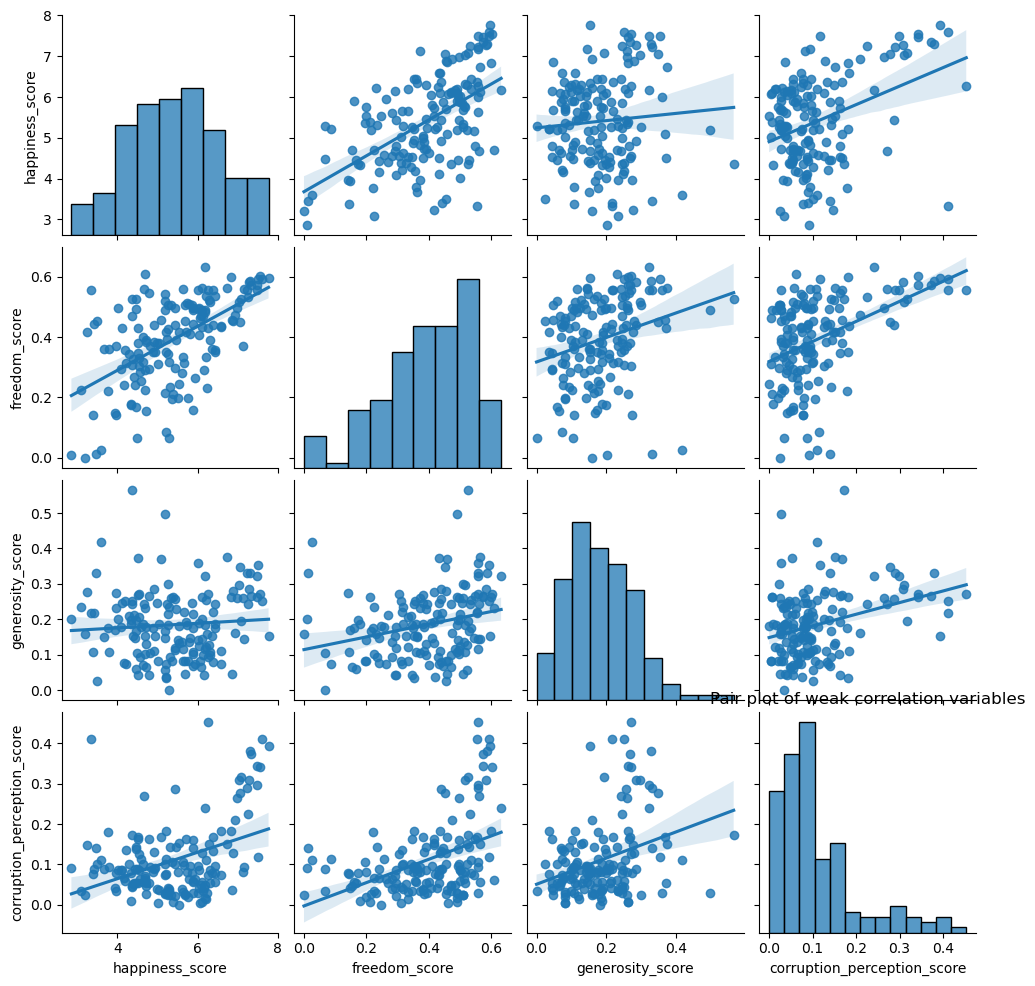

In [22]:
# Create pair plot of weak corr.

pair_plot_weak = sns.pairplot(df_sub_weak, kind='reg')
plt.title('Pair plot of weak correlation variables', fontsize = 12) # add a title)
plt.savefig("/Users/pau/10-06-2024 World Happiness Report/04 Analysis/Visualizations/pair_plot_weak_corr.png") # Save figure


#
The distribution of variables exhibiting positive correlations was already quite evident. However, it's the weaker correlations that caught my attention, particularly those between the happiness score and factors such as freedom, generosity, and corruption perception. These relationships warrant further exploration due to their potential implications on the overall happiness score.

# 3.4. Categorical plot

#### Creating a categorical variable that splits the "happiness_score" column into categories


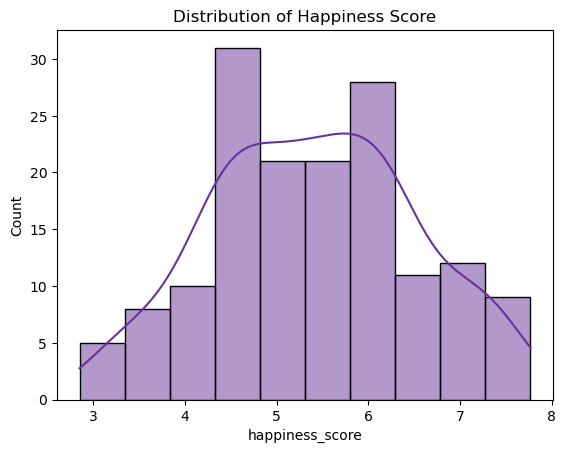

In [23]:
# Plot a histogram to visualize the distribution

sns.histplot(df_whr['happiness_score'], bins = 10,  color='rebeccapurple', kde = True)
plt.title('Distribution of Happiness Score', fontsize = 12) # add a title)
plt.savefig("/Users/pau/10-06-2024 World Happiness Report/04 Analysis/Visualizations/hist_distribution_happiness_score.png") # Save figure


In [24]:
# Create score categories

df_whr.loc[df_whr['happiness_score'] < 4.5 , 'Score Category'] = 'Low Happiness'
df_whr.loc[(df_whr['happiness_score'] >= 4.5) & (df_whr['happiness_score'] < 6.5), 'Score Category'] = 'Middle Happiness'
df_whr.loc[df_whr['happiness_score'] >= 6.5, 'Score Category'] = 'High Happiness'

In [25]:
df_whr['Score Category'].value_counts(dropna = False)

Score Category
Middle Happiness    97
Low Happiness       35
High Happiness      24
Name: count, dtype: int64

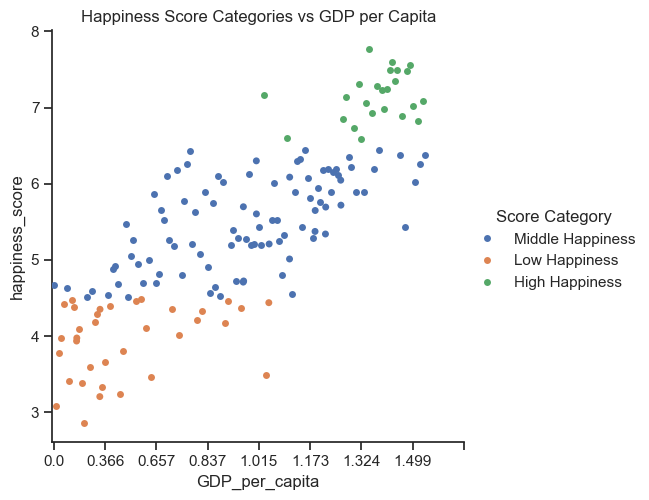

In [26]:
# Create categorical plot: Comparing Happiness Score Categories Across GDP per Capita

sns.set(style="ticks")
catplot_gdp = sns.catplot(x='GDP_per_capita', y='happiness_score', hue="Score Category", data=df_whr)

# Manually set the x-axis tick positions and labels
plt.xticks([0, 20, 40, 60, 80, 100, 120, 140, 160])

plt.title('Happiness Score Categories vs GDP per Capita', fontsize = 12) # add a title
plt.savefig("/Users/pau/10-06-2024 World Happiness Report/04 Analysis/Visualizations/catplot_happiness_score_cat_GDP.png") # Save figure


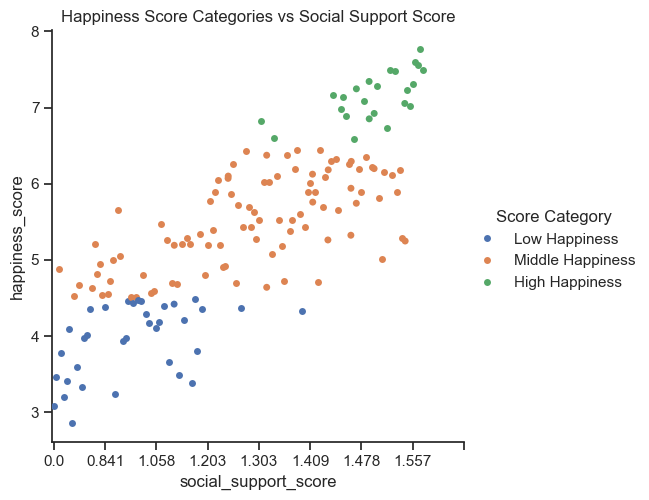

In [27]:
# Create categorical plot: Comparing Happiness Score Categories Across Social Support Score

sns.set(style="ticks")
catplot_social = sns.catplot(x='social_support_score', y='happiness_score', hue="Score Category", data=df_whr)

# Manually set the x-axis tick positions and labels
plt.xticks([0, 20, 40, 60, 80, 100, 120, 140, 160])

plt.title('Happiness Score Categories vs Social Support Score', fontsize = 12) # add a title)
plt.savefig("/Users/pau/10-06-2024 World Happiness Report/04 Analysis/Visualizations/catplot_happiness_score_cat_Social_support.png") # Save figure


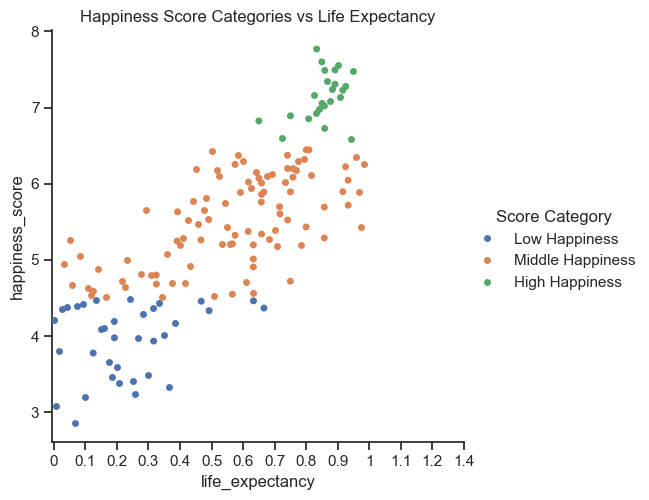

In [28]:
# Create categorical plot: Comparing Happiness Score Categories Across Life Expectancy

sns.set(style="ticks")
catplot_social = sns.catplot(x='life_expectancy', y='happiness_score', hue="Score Category", data=df_whr)

# Manually set the x-axis tick positions and labels
plt.xticks([0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156], labels=('0', '0.1','0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1', '1.1', '1.2', '1.4'))

plt.title('Happiness Score Categories vs Life Expectancy', fontsize = 12) # add a title)
plt.savefig("/Users/pau/10-06-2024 World Happiness Report/04 Analysis/Visualizations/catplot_Happiness_score_cat_Life_Expectancy.png") # Save figure


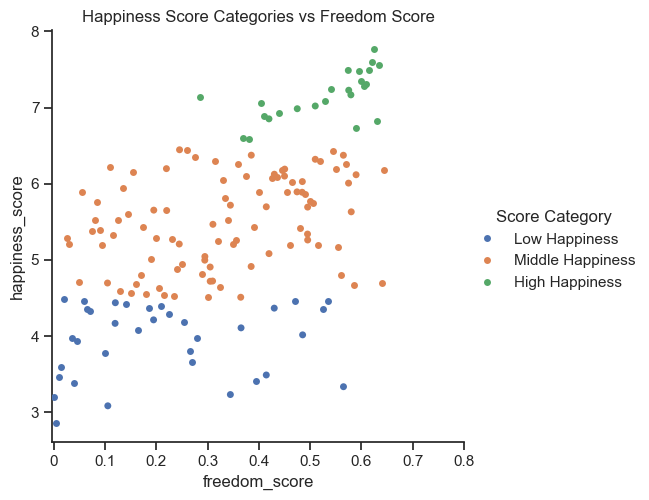

In [29]:
# Create categorical plot: Comparing Happiness Score Categories Across Freedom (Freedom to make life choices) Score

sns.set(style="ticks")
catplot_social = sns.catplot(x='freedom_score', y='happiness_score', hue="Score Category", data=df_whr)

# Manually set the x-axis tick positions and labels
plt.xticks([0, 20, 40, 60, 80, 100, 120, 140, 160], labels=('0', '0.1','0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8'))

plt.title('Happiness Score Categories vs Freedom Score', fontsize = 12) # add a title)
plt.savefig("/Users/pau/10-06-2024 World Happiness Report/04 Analysis/Visualizations/catplot_Happiness_score_cat_Freedom_Score.png") # Save figure


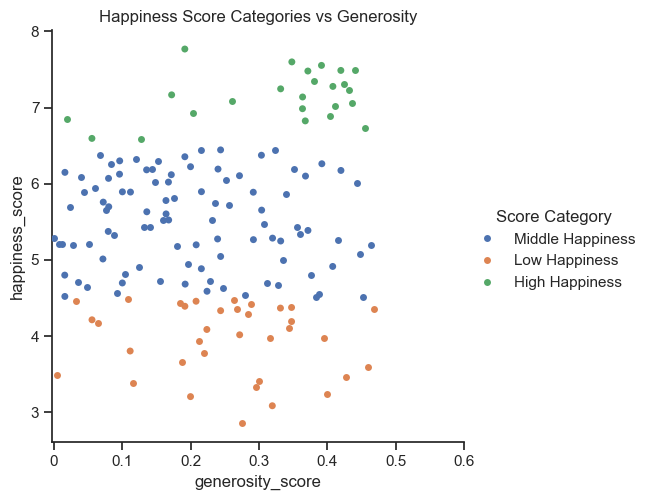

In [30]:
# Create categorical plot: Comparing Happiness Score Categories Across Generosity Score

sns.set(style="ticks")
catplot_social = sns.catplot(x='generosity_score', y='happiness_score', hue="Score Category", data=df_whr)

# Manually set the x-axis tick positions and labels
plt.xticks([0, 25, 50, 75, 100, 125, 150], labels=('0', '0.1','0.2', '0.3', '0.4', '0.5', '0.6'))

plt.title('Happiness Score Categories vs Generosity', fontsize = 12) # add a title)
plt.savefig("/Users/pau/10-06-2024 World Happiness Report/04 Analysis/Visualizations/catplot_Happiness_score_cat_Generosity_Score.png") # Save figure


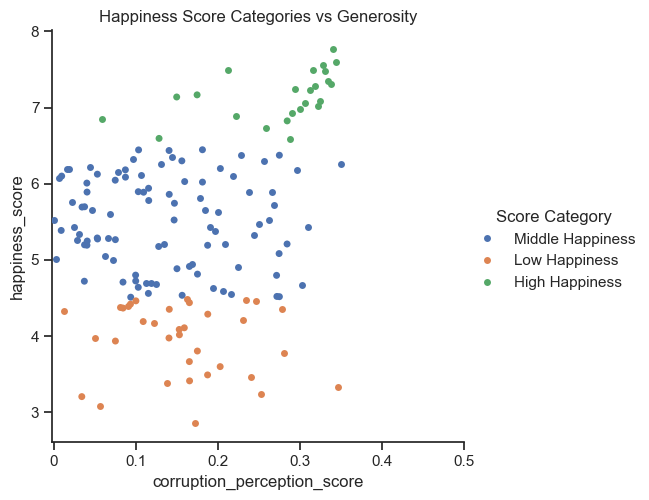

In [31]:
# Create categorical plot: Comparing Happiness Score Categories Across Corruption Perception Score

sns.set(style="ticks")
catplot_social = sns.catplot(x='corruption_perception_score', y='happiness_score', hue="Score Category", data=df_whr)

# Manually set the x-axis tick positions and labels
plt.xticks([0, 32, 64, 96, 128, 160], labels=('0', '0.1','0.2', '0.3', '0.4', '0.5'))

plt.title('Happiness Score Categories vs Generosity', fontsize = 12) # add a title)
plt.savefig("/Users/pau/10-06-2024 World Happiness Report/04 Analysis/Visualizations/catplot_Happiness_score_cat_Corruption_Perception_Score.png") # Save figure


1. **Positive Relationships with Happiness Score**:
   - **GDP per Capita**: There is a strong positive relationship between GDP per capita and happiness score, indicating that higher levels of economic prosperity tend to correlate with higher reported happiness.
   - **Social Support**: Similarly, countries with stronger social support systems tend to have higher happiness scores, suggesting that social connections and community support contribute positively to overall happiness.
   - **Life Expectancy**: Higher life expectancy is also positively correlated with happiness scores, implying that better health outcomes contribute to greater subjective well-being.

2. **No Clear Relationships**:
   - **Freedom Score**: While freedom is an important factor in overall well-being, the scatter plot does not show a clear relationship between freedom scores and happiness. This suggests that factors beyond personal freedom might play a more significant role in determining happiness.
   - **Generosity Score**: The scatter plot does not reveal a significant relationship between generosity and happiness scores, indicating that generosity alone may not strongly influence overall happiness levels.
   - **Corruption Perception Score**: Similarly, there is no clear relationship between corruption perception scores and happiness, suggesting that while corruption is a significant societal issue, it may not directly impact individual happiness levels in a straightforward manner.

3. **Observations on High Happiness Scores**:
   - Countries with the highest happiness scores tend to cluster in the upper right corner of the plots for freedom, generosity, and corruption perception. This observation suggests that while these factors may not have a linear relationship with happiness scores across the entire range, they could still influence happiness in countries with exceptionally high scores.
   - The presence of countries with high happiness scores despite lower generosity and higher corruption perception scores may indicate cultural or contextual factors at play, highlighting the complexity of measuring and understanding happiness across different societies.

In summary, the scatter plots provide valuable insights into the complex interplay between economic, social, and cultural factors in shaping happiness levels. While some relationships, such as those with GDP per capita and social support, appear robust, others, like freedom, generosity, and corruption perception, exhibit more nuanced patterns that warrant further investigation.

# 4. Initial and Further Questions

1. **How does GDP per capita correlate with happiness scores across countries?**
   - There is a strong positive correlation between GDP per capita and happiness scores across countries. Generally, countries with higher GDP per capita tend to have higher happiness scores.

2. **Is there a significant relationship between social support and happiness levels?**
   - There is a significant positive relationship between social support and happiness levels. Countries with stronger social support systems tend to report higher levels of happiness.

3. **What is the distribution of happiness scores across different regions or continents?**
   - The distribution of happiness scores across regions or continents varies. Some regions may consistently have higher average happiness scores compared to others. Further analysis by region or continent can provide more insights into these variations.

4. **Are there any trends or patterns in the relationship between life expectancy and happiness?**
   - Generally, there is a positive correlation between life expectancy and happiness. Countries with higher life expectancy tend to have higher happiness scores, reflecting the importance of health and well-being in overall happiness.

5. **How does the perception of freedom to make life choices affect happiness levels?**
   - The perception of freedom to make life choices can influence happiness levels. Countries where individuals perceive higher levels of freedom often report higher happiness scores.

6. **Is there a notable difference in generosity scores between countries with high and low GDP per capita?**
   - There might be a difference in generosity scores between countries with high and low GDP per capita, although this relationship may not be straightforward. Further analysis is needed to determine the extent of this difference and its impact on happiness scores.

7. **Do countries with lower levels of corruption tend to have higher happiness scores?**
   - Countries with lower levels of corruption tend to have higher happiness scores. Transparency, accountability, and trust in institutions are important factors contributing to overall happiness.

8. **How do happiness scores vary between urban and rural areas within countries?**
   - There may be variations in happiness scores between urban and rural areas within countries. Urbanization, access to resources, infrastructure, and quality of life factors may influence these differences.

9. **Are there any outliers or anomalies in the dataset that might warrant further investigation?**
   - Outliers or anomalies in the dataset may indicate unique cases that deviate significantly from the general trend. These outliers warrant further investigation to understand the factors contributing to their unusual happiness scores.

10. **How have happiness scores changed over time, if longitudinal data is available?**
    - If longitudinal data is available, analyzing changes in happiness scores over time can provide insights into trends and patterns in happiness levels. This analysis can help identify factors driving changes in happiness and inform policy decisions aimed at improving overall well-being.

### Based on the initial findings in the visual exploration, some additional questions that may arise include:

1. **Are there regional or cultural differences in the factors influencing happiness scores?**
   - Exploring whether certain regions or cultural contexts exhibit unique relationships between factors such as GDP per capita, social support, and happiness scores can provide deeper insights into the drivers of happiness across different societies.

2. **How do subjective perceptions of well-being differ from objective indicators such as GDP per capita or life expectancy?**
   - Investigating the relationship between subjective well-being measures (e.g., happiness scores) and objective indicators of prosperity and health can shed light on the discrepancies between individuals' perceptions and factual circumstances.

3. **What role do government policies and social programs play in shaping happiness levels within countries?**
   - Analyzing the impact of government interventions, welfare policies, and social programs on happiness scores can help understand the effectiveness of public policies in promoting citizens' well-being.

4. **Are there any demographic or socioeconomic factors that moderate the relationship between key variables and happiness?**
   - Examining whether demographic factors such as age, gender, education level, or income influence the strength or direction of relationships between variables like GDP per capita, social support, and happiness scores can provide nuanced insights into the complexities of well-being.

5. **How do changes in external factors, such as economic recessions or global events, affect national happiness levels?**
   - Studying the impact of external shocks or events on happiness scores over time can highlight the resilience of societies and uncover adaptive mechanisms for maintaining well-being in the face of adversity.

6. **What are the long-term implications of happiness disparities between countries and regions?**
   - Considering the potential consequences of persistent happiness disparities, such as migration patterns, social unrest, or economic development trajectories, can inform strategies for promoting more equitable and sustainable well-being outcomes globally.

7. **How do individual perceptions of freedom and corruption align with broader societal trends in happiness?**
   - Exploring whether individual perceptions of freedom and corruption align with aggregate happiness scores at the national level can provide insights into the role of trust, governance, and societal norms in shaping overall well-being.

8. **What are the underlying mechanisms driving the observed relationships between variables in the dataset?**
   - Conducting qualitative research or in-depth analyses to uncover the underlying mechanisms and causal pathways linking variables such as GDP per capita, social support, and happiness scores can enrich our understanding of the complex dynamics driving well-being outcomes.

# 5. Hypotheses

1. **Hypothesis 1: GDP per Capita and Happiness Scores**
   - Null Hypothesis (H0): There is no significant correlation between a country's GDP per capita and its happiness score.
   - Alternative Hypothesis (H1): Higher GDP per capita is associated with higher happiness scores across countries.

2. **Hypothesis 2: Social Support and Happiness Levels**
   - Null Hypothesis (H0): There is no significant relationship between social support measures and happiness levels.
   - Alternative Hypothesis (H1): Greater social support is positively correlated with higher happiness levels.

3. **Hypothesis 3: Life Expectancy and Happiness**
   - Null Hypothesis (H0): There is no significant association between life expectancy and happiness scores.
   - Alternative Hypothesis (H1): Countries with higher life expectancy tend to have higher happiness scores.

4. **Hypothesis 4: Freedom to Make Life Choices and Happiness**
   - Null Hypothesis (H0): The perception of freedom to make life choices does not impact happiness levels.
   - Alternative Hypothesis (H1): Greater freedom to make life choices is associated with higher happiness levels.

5. **Hypothesis 5: Generosity and Happiness**
   - Null Hypothesis (H0): There is no significant relationship between generosity scores and happiness levels.
   - Alternative Hypothesis (H1): Higher levels of generosity are positively correlated with higher happiness levels.

6. **Hypothesis 6: Corruption Perception and Happiness**
   - Null Hypothesis (H0): Corruption perception does not influence happiness scores.
   - Alternative Hypothesis (H1): Lower levels of perceived corruption are associated with higher happiness scores.